# Big Smart Sales Data

Retail is another industry which extensively uses analytics to optimize business processes. Tasks like product placement, inventory management, customized offers, product bundling, etc. are being smartly handled using data science techniques. As the name suggests, this data comprises of transaction records of a sales store.

The data has 8523 rows of 12 variables.

**Problem**: Predict the sales of a store.



## Library Imports

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import typing

## Data Import

In [2]:
train_df_raw = pd.read_csv('Train.csv')

In [3]:
train_df_raw.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_df_raw.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
train_df_raw.shape

(8523, 12)

In [6]:
def eda_df_construction(df: pd.DataFrame) -> pd.DataFrame:
    """create a quick exploratory data analysis as a dataframe that captures descriptive statistics for all the columns, not just numerical as in '.describe()'"""
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()

    return pd.DataFrame(eda_df)

In [7]:
eda_df_construction(train_df_raw)

,null_sum,null_pct,dtypes,count,mean,min,max
Item_Fat_Content,0,0.000000,object,8523,NaN,LF,reg
Item_Identifier,0,0.000000,object,8523,NaN,DRA12,NCZ54
Item_MRP,0,0.000000,float64,8523,140.992782,31.29,266.888
Item_Outlet_Sales,0,0.000000,float64,8523,2181.288914,33.29,13087
Item_Type,0,0.000000,object,8523,NaN,Baking Goods,Starchy Foods
Item_Visibility,0,0.000000,float64,8523,0.066132,0,0.328391
Item_Weight,1463,0.171653,float64,7060,12.857645,4.555,21.35
Outlet_Establishment_Year,0,0.000000,int64,8523,1997.831867,1985,2009
Outlet_Identifier,0,0.000000,object,8523,NaN,OUT010,OUT049
Outlet_Location_Type,0,0.000000,object,8523,NaN,Tier 1,Tier 3


In [ ]:
def data_cleanse_pipeline(df: pd.Dataframe) -> pd.DataFrame:
    """steps taken for this specific data to make it ready for the algorithm"""
    cleaned_df = df

    #create new features
    cleaned_df['Years_In_Business'] = df['Outlet_Establishment_Year'] - df['Outlet_Establishment_Year'].min()

    #drop irrelevant features


    return cleaned_df

Check Correlation of numeric variables with Target(Item_Outlet_Sales)

In [8]:
correlations = train_df_raw.corrwith(train_df_raw['Item_Outlet_Sales']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]

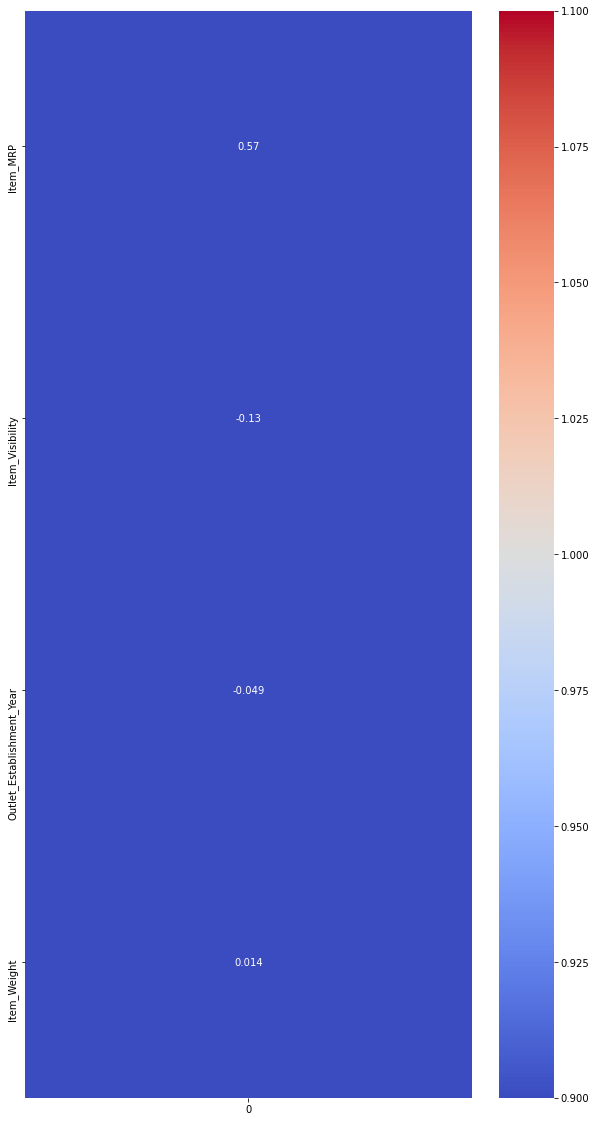

In [9]:
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=1, vmax=1, ax=ax);

In [11]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_In_Business'],
      dtype='object')

In [12]:
train_df_raw['Outlet_Identifier'].nunique()

10

In [40]:
cols = ['Outlet_Identifier', 'Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year', 'Item_Identifier', 'Item_Type', 'Item_MRP', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility']

df_ordered_cols = train_df_raw[cols]

In [48]:
df_ordered_cols = df_ordered_cols.drop(['Outlet_Size', 'Item_Weight'], axis=1)

In [50]:
eda_df_construction(df_ordered_cols)

,null_sum,null_pct,dtypes,count,mean,min,max
Item_Fat_Content,0,0.0,object,8523,NaN,LF,reg
Item_Identifier,0,0.0,object,8523,NaN,DRA12,NCZ54
Item_MRP,0,0.0,float64,8523,140.992782,31.29,266.888
Item_Type,0,0.0,object,8523,NaN,Baking Goods,Starchy Foods
Item_Visibility,0,0.0,float64,8523,0.066132,0,0.328391
Outlet_Establishment_Year,0,0.0,int64,8523,1997.831867,1985,2009
Outlet_Identifier,0,0.0,object,8523,NaN,OUT010,OUT049
Outlet_Location_Type,0,0.0,object,8523,NaN,Tier 1,Tier 3
Outlet_Type,0,0.0,object,8523,NaN,Grocery Store,Supermarket Type3


In [51]:
df_ordered_cols.sort_values(['Outlet_Identifier', 'Item_Identifier'])

,Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Outlet_Establishment_Year,Item_Identifier,Item_Type,Item_MRP,Item_Fat_Content,Item_Visibility
8043,OUT010,Grocery Store,Tier 3,1998,DRA12,Soft Drinks,143.0154,Low Fat,0.068535
4130,OUT010,Grocery Store,Tier 3,1998,DRA24,Soft Drinks,163.8868,Regular,0.066832
8371,OUT010,Grocery Store,Tier 3,1998,DRA59,Soft Drinks,183.9924,Regular,0.214125
2479,OUT010,Grocery Store,Tier 3,1998,DRB13,Soft Drinks,189.0530,Regular,0.011791
8063,OUT010,Grocery Store,Tier 3,1998,DRB25,Soft Drinks,107.0938,Low Fat,0.116261
...,...,...,...,...,...,...,...,...,...
74,OUT049,Supermarket Type1,Tier 1,1999,NCZ18,Household,254.3698,low fat,0.186357
4418,OUT049,Supermarket Type1,Tier 1,1999,NCZ30,Household,119.0098,Low Fat,0.026226
6488,OUT049,Supermarket Type1,Tier 1,1999,NCZ42,Household,235.5248,LF,0.011305
6879,OUT049,Supermarket Type1,Tier 1,1999,NCZ53,Health and Hygiene,189.2214,Low Fat,0.024515


In [79]:
cat_cols = df_ordered_cols.loc[:, df_ordered_cols.dtypes == object].columns.tolist()
cat_cols
df_ordered_cols[cat_cols].unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [90]:
def unique_values_by_feature(df: pd.DataFrame) -> dict:
    """Return a list of lists for categorical features and the categories they encompass"""
    #gather categorical column names
    cat_cols = df.loc[:, df.dtypes == object].columns.tolist()

    #cycle through the list and store unique values as a list
    results = {}
    for feature in cat_cols:
        results[feature] = df[feature].unique().tolist()

    return results


In [91]:
unique_values_by_feature(df_ordered_cols)

{'Outlet_Identifier': ['OUT049',
  'OUT018',
  'OUT010',
  'OUT013',
  'OUT027',
  'OUT045',
  'OUT017',
  'OUT046',
  'OUT035',
  'OUT019'],
 'Outlet_Type': ['Supermarket Type1',
  'Supermarket Type2',
  'Grocery Store',
  'Supermarket Type3'],
 'Outlet_Location_Type': ['Tier 1', 'Tier 3', 'Tier 2'],
 'Item_Identifier': ['FDA15',
  'DRC01',
  'FDN15',
  'FDX07',
  'NCD19',
  'FDP36',
  'FDO10',
  'FDP10',
  'FDH17',
  'FDU28',
  'FDY07',
  'FDA03',
  'FDX32',
  'FDS46',
  'FDF32',
  'FDP49',
  'NCB42',
  'DRI11',
  'FDU02',
  'FDN22',
  'FDW12',
  'NCB30',
  'FDC37',
  'FDR28',
  'NCD06',
  'FDV10',
  'DRJ59',
  'FDE51',
  'FDC14',
  'FDV38',
  'NCS17',
  'FDP33',
  'FDO23',
  'DRH01',
  'NCX29',
  'FDV20',
  'DRZ11',
  'FDX10',
  'FDB34',
  'FDK43',
  'FDA46',
  'FDC02',
  'FDL50',
  'FDM39',
  'NCP05',
  'FDV49',
  'FDL12',
  'FDS02',
  'NCL17',
  'FDM40',
  'FDR13',
  'FDA43',
  'NCP18',
  'FDK21',
  'NCX54',
  'DRK35',
  'FDY21',
  'FDI26',
  'FDM20',
  'FDV27',
  'FDF09',
  'FDY4

In [ ]:
df_ordered_cols['Years_In_Business'] = df_ordered_cols['Outlet_Establishment_Year'] - df_ordered_cols['Outlet_Establishment_Year'].min()